<a href="https://www.kaggle.com/code/ludmiladias/multiclasses-unet?scriptVersionId=145859465" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div id="title"><h1 style="color:white;background:#62909d;border-radius:5px;padding:30px;font-family:'Sans-Serif', cursive;font-size:50px;text-align:center">U-Net Multiclasses Training</h1></div>

Projeto desenvolvido usando a rede de segmentação U-NET, biblioteca Keras e Tensorflow.
O Road Mapper DNN tem como objetivo gerar mapas de estrada com segmentação das faixas de sinalização utilizada pelos veículos, tendo como entrada mapas de remissão gerados pelo LIDAR - sensor laser que faz parte do sistema de carros autônomos como o ASTRO da Lume Robotics.


Input | Output
------|--------
![](https://github.com/LCAD-UFES/carmen_lcad/blob/master/src/road_mapper/data/i7705600_-338380.png?raw=true)|![](https://github.com/LCAD-UFES/carmen_lcad/blob/master/src/road_mapper/data/r7705600_-338380_map_1_6.png?raw=true)



## <div id="summary">**<font color="#62909d" size="5">Tabela de Conteúdos</font>**</div>

**<font size="2"><a href="#chap1">1. Instalar Pacotes</a></font>**
**<br><font size="2"><a href="#chap2">2. Configurações Iniciais</a></font>**
**<br><font size="2"><a href="#chap3">3. Tratamento de Dados</a></font>**
**<br><font size="2"><a href="#chap4">4. Compilação e Treinamento da Rede</a></font>**
**<br><font size="2"><a href="#chap5">5. Analisando os Resultados</a></font>**
**<br><font size="2"><a href="#chap6">6. Realizando Testes</a></font>**

<div id="chap1"><h1 style="color:white;background:#62909d;border-radius:5px;padding:30px;font-family:'Sans-Serif', cursive;font-size:50px;text-align:center">Instalar Pacotes</h1></div>


In [ ]:
%pip install opencv-python
%pip install tensorflow
%pip install numpy
%pip install tqdm
%pip install scikit-image
%pip install scikit-learn
%pip install matplotlib


In [11]:
!pip install git+https://github.com/allegroai/clearml
!pip install clearml-agent

  Cloning https://github.com/allegroai/clearml to /tmp/pip-req-build-kab51o6l
  Running command git clone --filter=blob:none --quiet https://github.com/allegroai/clearml /tmp/pip-req-build-kab51o6l
  Resolved https://github.com/allegroai/clearml to commit 2a5fd56fdb13cf6ec80fde5bb99655f0de9d69be
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.1/409.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-lsp 4.2.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 whic

In [12]:
! export MPLBACKEND=TkAg

In [14]:
from clearml import Task

Task.set_credentials(
     api_host="https://api.clear.ml", 
     web_host="https://app.clear.ml", 
     files_host="https://files.clear.ml", 
     key='7J4LGHV9MXD7N7RR48B1', 
     secret='p5KSM4HnkrA17tQEEnrdgYBYIOEMC9WB1Aewl8V5RUaOVG6vFl'
)

In [15]:
!clearml-agent daemon --queue default

Using environment access key CLEARML_API_ACCESS_KEY=7J4LGHV9MXD7N7RR48B1
Using environment secret key CLEARML_API_SECRET_KEY=********
Current configuration (clearml_agent v1.6.1, location: None):
----------------------
api.version = 1.5
api.verify_certificate = true
api.default_version = 1.5
api.http.max_req_size = 15728640
api.http.retries.total = 240
api.http.retries.connect = 240
api.http.retries.read = 240
api.http.retries.redirect = 240
api.http.retries.status = 240
api.http.retries.backoff_factor = 1.0
api.http.retries.backoff_max = 120.0
api.http.wait_on_maintenance_forever = true
api.http.pool_maxsize = 512
api.http.pool_connections = 512
api.api_server = https://api.clear.ml
api.files_server = https://files.clear.ml
api.web_server = https://app.clear.ml
api.credentials.access_key = 7J4LGHV9MXD7N7RR48B1
agent.worker_id = 
agent.worker_name = 4cde8052896b
agent.force_git_ssh_protocol = false
agent.python_binary = 
agent.package_manager.type = pip
agent.package_manager.pip_versio

In [2]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=KX15LQIVN3C9LYAJFRAS
%env CLEARML_API_SECRET_KEY=dzFnxgmCuZ15ZBkJ9COoUW2E2804Aq5kk1lDIFj7jbc4iyVEko

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=KX15LQIVN3C9LYAJFRAS
env: CLEARML_API_SECRET_KEY=dzFnxgmCuZ15ZBkJ9COoUW2E2804Aq5kk1lDIFj7jbc4iyVEko


In [3]:
from clearml import Task
task = Task.init(project_name="road_mapper_dnn", task_name="training_50k_data")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ClearML Task: created new task id=e3993c5d4112463489fa3e7e585b7314
2023-09-29 18:31:50,342 - clearml.Repository Detection - WARNING - Jupyter Notebook auto-logging failed, could not access: /kaggle/working/__notebook_source__.ipynb
2023-09-29 18:31:50,356 - clearml.Task - INFO - Storing jupyter notebook directly as code


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning:

unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning:

file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tensorflow13GcsFileSystemE']



ClearML results page: https://app.clear.ml/projects/a0faa480ca2c4a77befa0d7f647cc68c/experiments/e3993c5d4112463489fa3e7e585b7314/output/log
ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


<div id="chap2"><h1 style="color:white;background:#62909d;border-radius:5px;padding:30px;font-family:'Sans-Serif', cursive;font-size:30px;text-align:center">Configurações Iniciais</h1></div>


In [5]:
!gdown --id 1mJcJC3K3mGxvfsypSKMBxP2930ECHQpC

/bin/bash: line 1: gdown: command not found


In [16]:
import os
import glob

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
import tensorflow as tf

from keras import backend as K



In [5]:
SIZE_X = 128 
SIZE_Y = 128

TRAIN_PATH = 'DATASET/treino/'
TEST_PATH_HIGHWAY = 'DATASET/teste/highway/'
TEST_PATH_UFES = 'DATASET/teste/ufes/'

IMG_CHANNELS = 1
NUM_CLASSES = 17  # Número de classes

<div id="chap3"><h1 style="color:white;background:#62909d;border-radius:5px;padding:30px;font-family:'Sans-Serif', cursive;font-size:50px;text-align:center">Tratamento de Dados</h1></div>

Pule essa etapa se você já tiver seus dados prontos em um CSV.

**<font color="#62909d" size="5">Importando os arquivos</font>**


In [ ]:
# Obter uma lista das subpastas
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids_hw = next(os.walk(TEST_PATH_HIGHWAY))[1]
test_ids_uf = next(os.walk(TEST_PATH_UFES))[1]

In [ ]:
X_train = np.zeros((len(train_ids), SIZE_Y, SIZE_X, IMG_CHANNELS), dtype = np.uint8)
Y_train = np.zeros((len(train_ids), SIZE_Y, SIZE_X), dtype = np.uint8)


X_test = np.zeros((len(test_ids_hw), SIZE_Y, SIZE_X, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_ids_hw), SIZE_Y, SIZE_X), dtype = np.uint8)


In [ ]:
# CARREGA IMAGENS PARA ARRAY DE TREINO
def imgs_to_array(TRAIN_PATH, type_data):
    if type_data == 'I':
        
        for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):  
            
            path = TRAIN_PATH + id_
            
            # Read the image and keep the first IMG_CHANNELS channels
            img = imread(path + '/images/i' + id_ + '.png', 0) 
            
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            img = np.expand_dims(img, axis=2)
            
            # Resize the image to SIZE_Y x SIZE_X while keeping the pixel values (mode='constant')
            img = resize(img, (SIZE_Y, SIZE_X), mode='constant', preserve_range=True)  
            
            # Store the processed image into the X_train array at index n
            X_train[n]=img
            
        return X_train

    elif type_data == 'M':
    # Loop through all train_ids
        for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):  
            
            path = TRAIN_PATH + id_
            
            # Read the mask file
            mask = imread(path + '/masks/r' + id_ + '.png', 0)
            
            mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)
            
                
            # Store the processed mask into the Y_train array at index n
            Y_train[n] = mask
            
        return Y_train
    
    return []

In [ ]:
image_dataset = imgs_to_array(TRAIN_PATH, type_data='I') # 'I' - Imagens de input
mask_dataset = imgs_to_array(TRAIN_PATH, type_data='M') # 'M' - Masks do Ground Truth

In [ ]:
# SALVAR ARRAYS DAS IMAGENS

import pickle
try:  
    arquivo = open("bin/image_dataset.bin", "wb")
    pickle.dump(image_dataset, arquivo)
    arquivo.close()
except:
    print("Problemas com o arquivo treino.")

try:  
    arquivo = open("bin/mask_dataset.bin", "wb")
    pickle.dump(mask_dataset, arquivo)
    arquivo.close()
except:
    print("Problemas com o arquivo teste.")

In [ ]:
#  LOAD DOS ARRAYS SALVOS

import pickle

try:
    arquivo = open("/kaggle/input/road-mapper-dataset/image_dataset.bin", "rb")
    image_dataset = pickle.load(arquivo)
    arquivo.close()
except:
    print("Problemas com o arquivo treinox.")
    
try:
    arquivo = open("/kaggle/input/road-mapper-dataset/mask_dataset.bin", "rb")
    mask_dataset = pickle.load(arquivo)
    arquivo.close()
except:
    print("Problemas com o arquivo treinoy.")

**<font color="#62909d" size="5">Normalização e tratamento dos arrays</font>**


In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

In [ ]:
# Normalizar dados do X
image_dataset = normalize(image_dataset, axis=1)

In [ ]:
# Realizar o Label Encoder (Y)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask_dataset.shape
train_masks_reshaped = mask_dataset.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)
print(train_masks_input.shape)

In [ ]:
#Dividir dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, train_masks_input, test_size = 0.2, random_state = 42)

In [ ]:
print("Os valores das classes nesse dataset são ... ", np.unique(y_train))

In [ ]:
# Gerar pesos das classes (nova implementação em processo)
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(train_masks_reshaped_encoded),
                                                 y = train_masks_reshaped_encoded)
print("Class weights are...:", class_weights)

**<font color="#62909d" size="5">Salvar arquivo como CSV</font>**


In [ ]:
import csv
import pandas as pd

def salvar_csv(X, Y, file_name):
    # Criar um DataFrame com os arrays
    data = {'X_input': X.tolist(), 'Y_output': Y.tolist()}
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False, mode="a")

In [ ]:
# Para salvar arquivo grande em partes
for i in range(0,8):
    print(i)
    salvar_csv(X_train[(i*5000):((i+1)*5000)], Y_train[(i*5000):((i+1)*5000)], 'train_data50.csv') # arquivo de treino

In [ ]:
for j in range(0,2):
    print(j)
    salvar_csv(X_test[(j*5000):((j+1)*5000)], Y_test[(j*5000):((j+1)*5000)], 'test_data50.csv') # arquivo de teste

In [ ]:
# Link para download dos arquivos
from IPython.display import FileLink, FileLinks
display(FileLink('train_data.csv'))
display(FileLink('test_data.csv'))


<div id="chap4"><h1 style="color:white;background:#62909d;border-radius:5px;padding:30px;font-family:'Sans-Serif', cursive;font-size:40px;text-align:center">Compilação e Treinamento da Rede</h1></div>

**<font color="#62909d" size="5">Modelo 1 - Original U-NET</font>**

In [31]:
# Criando uma função para um convolution block
def conv_block(inputs, num_filters):
    x = tf.keras.layers.Conv2D(num_filters, (3, 3), activation="relu", 
                               kernel_initializer="he_normal", padding="same")(inputs)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Conv2D(num_filters, (3, 3), activation="relu", 
                               kernel_initializer="he_normal", padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    return x

# Criando a função para o expanding path
def upsample_block(inputs, conv_prev, num_filters):
    up = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding="same")(inputs)
    concat = tf.keras.layers.concatenate([up, conv_prev])
    conv = conv_block(concat, num_filters)
    return conv


In [32]:
import tensorflow as tf

# Inputs
inputs = tf.keras.layers.Input((SIZE_X, SIZE_Y, IMG_CHANNELS))

# Normalização
s = tf.keras.layers.Lambda(lambda x: x/255.0)(inputs) 

# Contraction path
c1 = conv_block(s, 16)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = conv_block(p1, 32)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = conv_block(p2, 64)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = conv_block(p3, 128)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

c5 = conv_block(p4, 256)

# Expansive path
c6 = upsample_block(c5, c4, 128)
c7 = upsample_block(c6, c3, 64)
c8 = upsample_block(c7, c2, 32)
c9 = upsample_block(c8, c1, 16)

# Output layer

outputs = tf.keras.layers.Conv2D(NUM_CLASSES, (1, 1), activation='softmax')(c9)

In [ ]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs], name="U-Net")
# Compilação
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.save('multiclass_road_mapper')
model.summary()


**<font color="#62909d" size="5">Modelo 2 - Custom U-NET</font>**
<br>**Modelo sendo utilizado no momento**

In [1]:
!pip install keras_unet

In [4]:
from keras_unet.models import custom_unet

model = custom_unet(
    input_shape=(128, 128, 1),
    use_batch_norm=True,
    num_classes=17,
    filters=16,
    dropout=0.2,
    output_activation='softmax')


ModuleNotFoundError: No module named 'keras_unet'

In [ ]:
model.summary()


**<font color="#62909d" size="5">Compilando o Modelo</font>**

In [23]:
# Carregando o modelo
from keras.models import load_model

def get_model():
    model = load_model('/kaggle/working/multiclass_road_mapper_customunet_00122')
    model.load_weights('/kaggle/working/multiclass_road_mapper_customunet_00122')
    nome_salvar_modelo = 'road_mapper_customunet_0015.keras'
    
    #optimizer=tfa.optimizers.RectifiedAdam(lr=1e-3)
    # loss = tf.keras.losses.SparseCategoricalCrossentropy()
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.0015)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    model.save(nome_salvar_modelo)

    return model

**<font color="#62909d" size="5">Batch Generator</font>**

In [19]:
from tensorflow.keras.utils import to_categorical
import json

def batch_generator(Train_df,batch_size,
                    steps):
    idx=1
    while True:
        yield load_data(Train_df,idx-1,batch_size)## Yields data
        if idx<=steps:
            idx+=1
        else:
            idx=1

def load_data(Train_df,idx,
              batch_size):
    n_classes = 17

    df = pd.read_csv(
                  Train_df, skiprows=idx*batch_size,
                  nrows=batch_size)

    x = []
    y = []

    try:
        for i in range(0, batch_size):
            x.append(json.loads(df.iloc[i,0]))
            y.append(json.loads(df.iloc[i,1]))
    except:
        df = pd.read_csv(
                  Train_df, skiprows=0,
                  nrows=batch_size)
        for i in range(0, batch_size):
            x.append(json.loads(df.iloc[i,0]))
            y.append(json.loads(df.iloc[i,1]))

    y = np.asarray(y)
    train_masks_cat = to_categorical(y, num_classes=n_classes)
    y_train_cat = train_masks_cat.reshape((y.shape[0], y.shape[1], y.shape[2], n_classes))

    return (np.asarray(x), y_train_cat)

In [21]:
import numpy as np

from keras.models import Sequential 
from keras.layers import Dense, Activation
batch_size = 32
nb_epoch = 20

# Objetos gerados para treino e validação
steps_per_epoch=np.ceil(8000/batch_size)
validation_steps=np.ceil(1984/batch_size)

my_training_batch_generator = batch_generator('/kaggle/input/remission-maps-10k/dataset_treino.csv', batch_size,steps_per_epoch)
my_validation_batch_generator = batch_generator('/kaggle/input/remission-maps-10k/dataset_teste.csv', batch_size,validation_steps)


# my_training_batch_generator1 = batch_generator('/kaggle/input/remission-maps-10k/dataset_treino.csv', batch_size,steps_per_epoch, pos_arq=0)
# my_training_batch_generator2 = batch_generator('/kaggle/input/remission-maps-10k/dataset_treino.csv', batch_size,steps_per_epoch, pos_arq=4000)
# my_validation_batch_generator1 = batch_generator('/kaggle/input/remission-maps-10k/dataset_teste.csv', batch_size,validation_steps, pos_arq=0)
# my_validation_batch_generator2 = batch_generator('/kaggle/input/remission-maps-10k/dataset_teste.csv', batch_size,validation_steps, pos_arq=992)

# data_files = [[my_training_batch_generator1, my_training_batch_generator2], [my_validation_batch_generator1, my_validation_batch_generator2]]

In [10]:
display("a")

'a'

**<font color="#62909d" size="5">Treinamento</font>**

In [ ]:
# Mixed precision (Nova funcionalidade senod testada e implementada)
# https://www.tensorflow.org/guide/mixed_precision?hl=pt-br
# https://wandb.ai/site/articles/mixed-precision-training-with-tf-keras

import tensorflow as tf

try:
  gpu = tf.distribute.cluster_resolver.GPUClusterResolver() # TPU detection
except ValueError:
  gpu = None

if gpu:
  policyConfig = 'mixed_bfloat16'
else: 
  policyConfig = 'mixed_float16'

policy = tf.keras.mixed_precision.Policy(policyConfig)
tf.keras.mixed_precision.set_global_policy(policy)

In [12]:
%pip install mnist_setup

ERROR: Could not find a version that satisfies the requirement mnist_setup (from versions: none)
ERROR: No matching distribution found for mnist_setup
Note: you may need to restart the kernel to use updated packages.


In [24]:
import os
import json

import tensorflow as tf

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    multi_worker_model= get_model()



In [25]:
# Model Checkpoint e Early Stopping
# https://github.com/luddias/DeepLearning-About/blob/main/checkpointing.md
# https://github.com/luddias/DeepLearning-About/blob/main/early_stoping.md

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

filepath="/kaggle/working/multiclass_road_mapper_customunet_00122"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=2)
callbacks_list = [checkpoint, es]

params= [nb_epoch, steps_per_epoch, validation_steps, callbacks_list]

In [26]:
# Treinamento
import tensorflow as tf
import pandas as pd

with strategy.scope():    
    history= multi_worker_model.fit(my_training_batch_generator,
                    epochs=nb_epoch,
                    steps_per_epoch=steps_per_epoch,
                    verbose=1, 
                    validation_data=my_validation_batch_generator,
                    validation_steps=validation_steps,
                    shuffle=True,
                    callbacks=[callbacks_list])

Epoch 1/20


2023-09-29 18:55:11.616755: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/spatial_dropout2d/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


250/250 [==============================] - ETA: 0s - loss: 0.6093 - categorical_accuracy: 0.7802
Epoch 1: val_categorical_accuracy improved from -inf to 0.78773, saving model to /kaggle/working/multiclass_road_mapper_customunet_00122
250/250 [==============================] - 1839s 7s/step - loss: 0.6093 - categorical_accuracy: 0.7802 - val_loss: 0.5813 - val_categorical_accuracy: 0.7877
Epoch 2/20
250/250 [==============================] - ETA: 0s - loss: 0.5731 - categorical_accuracy: 0.7881
Epoch 2: val_categorical_accuracy improved from 0.78773 to 0.79380, saving model to /kaggle/working/multiclass_road_mapper_customunet_00122
250/250 [==============================] - 1726s 7s/step - loss: 0.5731 - categorical_accuracy: 0.7881 - val_loss: 0.5489 - val_categorical_accuracy: 0.7938
Epoch 3/20
250/250 [==============================] - ETA: 0s - loss: 0.5417 - categorical_accuracy: 0.7951
Epoch 3: val_categorical_accuracy improved from 0.79380 to 0.80051, saving model to /kaggle/work

In [ ]:
# Salvando o modelo
model.save('road_mapper_custom_10k_32_20_0015.keras')


In [ ]:
# Salvando os resultados
import pickle
try:  
    arquivo = open("results_10k_32_20_0015.bin", "wb")
    pickle.dump(history, arquivo)
    arquivo.close()
except:
    print("Problemas com o arquivo results.")
   

In [9]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [10]:
download_file('/kaggle/working/multiclass_road_mapper_customunet', 'out')

/kaggle/working/out.zip

In [ ]:
file.remove() # remover arquivos do output

<div id="chap5"><h1 style="color:white;background:#62909d;border-radius:5px;padding:30px;font-family:'Sans-Serif', cursive;font-size:40px;text-align:center">Analisando os Resultados</h1></div>

In [25]:
# Importando arquivo de resultados
import pickle


arquivo = open("/kaggle/working/results_10k_64_10_005.bin", "rb")
history = pickle.load(arquivo)
arquivo.close()
print("Problemas com o arquivo treinox.")

ValueError: Unknown metric function: 'function'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [21]:
from keras.models import load_model

model = load_model('/kaggle/working/multiclass_road_mapper_customunet')


In [7]:
history = {'loss': [0.6093,0.5731,0.5417,0.5185,0.4984,0.4830,0.4668,0.4526,0.4439,0.4340,0.4238,0.4115,0.4053,0.4031,0.4013,0.3942,0.3796,0.3731,0.3636,0.3616], 
'categorical_accuracy': [0.7802,0.7881,0.7951,0.8006,0.8059,0.8097,0.8141,0.8180,0.8201,0.8232,0.8259,0.8299,0.8313,0.8315,0.8318,0.8342,0.8393,0.8415,0.8449,0.8455], 
'val_loss': [0.5813,0.5489,0.5254,0.5122,0.4893,0.5061,0.4606,0.4535,0.4633,0.4625,0.4432,0.4387,0.4266,0.4537, 0.4308, 0.4086, 0.4109, 0.4110, 0.4161, 0.3861], 
'val_categorical_accuracy': [0.7877,0.7938,0.8005,0.8031,0.8101,0.8051,0.8195,0.8214,0.8171,0.8213,0.8225,0.8269,0.8285,0.8180,0.8256,0.8338,0.8328,0.8327,0.8304,0.8412]}

for id in history:
    print(f'{id}: {len(history[id])}')

loss: 20
categorical_accuracy: 20
val_loss: 20
val_categorical_accuracy: 20


In [8]:
from __future__ import print_function

import pandas as pd
pd.__version__

dict = {'Training Loss': history['loss'], 'Val Loss': history['val_loss'], 
        'Training Acc': history['categorical_accuracy'], 'Val Acc': history['val_categorical_accuracy']}
df = pd.DataFrame(dict)
df

,Training Loss,Val Loss,Training Acc,Val Acc
0,0.6093,0.5813,0.7802,0.7877
1,0.5731,0.5489,0.7881,0.7938
2,0.5417,0.5254,0.7951,0.8005
3,0.5185,0.5122,0.8006,0.8031
4,0.4984,0.4893,0.8059,0.8101
5,0.4830,0.5061,0.8097,0.8051
6,0.4668,0.4606,0.8141,0.8195
7,0.4526,0.4535,0.8180,0.8214
8,0.4439,0.4633,0.8201,0.8171
9,0.4340,0.4625,0.8232,0.8213


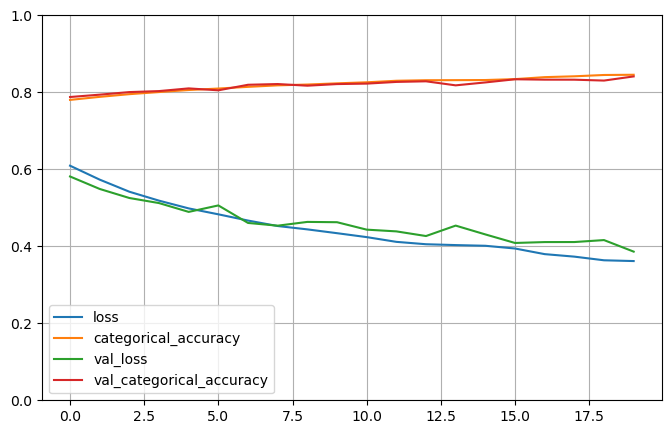

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

pd.DataFrame(history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("results_10k_32_20_0012_mw_curvegraph.png",format='png')
plt.show()

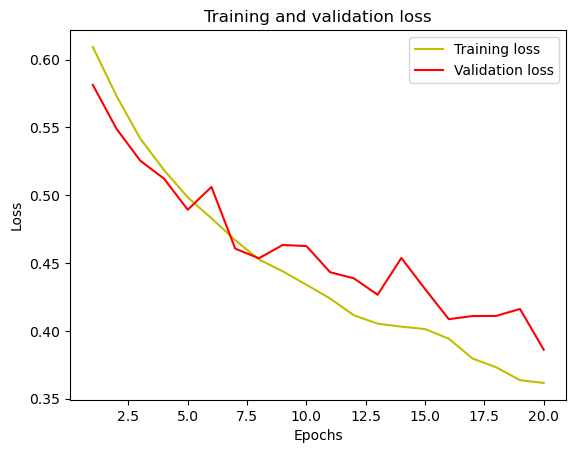

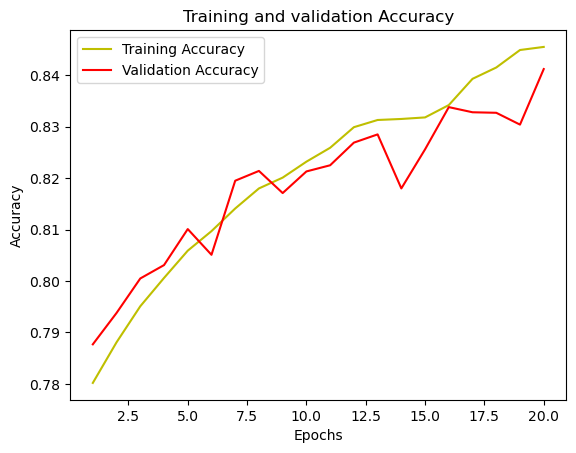

In [10]:
from matplotlib import pyplot as plt

loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('results_10k_32_20_0012_mw_loss.png', format='png')
plt.show()

acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('results_10k_32_20_0012_mw_acc.png', format='png')
plt.show()

In [1]:
# Load do modelo salvo
from keras.models import load_model
model = load_model("/kaggle/working/multiclass_road_mapper_customunet_00122", compile=False)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

<div id="chap6"><h1 style="color:white;background:#62909d;border-radius:5px;padding:30px;font-family:'Sans-Serif', cursive;font-size:40px;text-align:center">Realizando testes (Predict)</h1></div>

In [13]:
# Importando dados de teste
import pickle

try:
    arquivo = open("/kaggle/input/test-dataset/test_imgs.bin", "rb")
    X_test = pickle.load(arquivo)
    arquivo.close()
except:
    print("Problemas com o arquivo treinox.")
    
try:
    arquivo = open("/kaggle/input/test-dataset/test_masks_NE.bin", "rb")
    Y_test = pickle.load(arquivo)
    arquivo.close()
except:
    print("Problemas com o arquivo treinox.")

Problemas com o arquivo treinox.


In [2]:
import json
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
def test_data_generator(pos_ini, mode):
  test_df = "/kaggle/input/test-dataset/dataset_teste3556.csv"

  df = pd.read_csv(
                    test_df, skiprows=pos_ini, nrows=1)
  n_classes=17
  x = []
  y = []
  for i in range(0, len(df)):
      x.append(json.loads(df.iloc[i,0]))
      y.append(json.loads(df.iloc[i,1]))

  if mode=='x':
    return np.asarray(x)
  elif mode=='y':
    return np.asarray(y)

  return None

In [15]:
import requests
import time

def avoid_inactivity():
    try:
        requests.get('https://www.google.com')
        return False
    except:
        return True

In [4]:
accuracy_list = []

In [5]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

n_classes=17
num_imgs = int(3556/4)
batch_size = 1

for i in tqdm(range(num_imgs, num_imgs*2), desc="Processing.."):

    y_pred = model.predict(test_data_generator(i, 'x'), verbose=0)
    Y_test = test_data_generator(i, 'y')
    
    y_pred_argmax=np.argmax(y_pred, axis=3)
    # train_masks_cat = to_categorical(Y_test, num_classes=n_classes)
    # Y_test = train_masks_cat.reshape((Y_test.shape[0], Y_test.shape[1], Y_test.shape[2], n_classes))
    Y_test= Y_test.astype(np.uint8)
    y_pred= y_pred_argmax.astype(np.uint8)
    predictions_flat = y_pred.flatten()
    y_flat = Y_test.flatten()
    accuracy_list.append(accuracy_score(y_flat, predictions_flat))

print('Finished!')

len(accuracy_list)

Processing..: 100%|██████████| 889/889 [39:24<00:00,  2.66s/it]

Finished!


889

In [6]:
print(sum(accuracy_list)/len(accuracy_list))

0.6306617831218363


In [129]:
accuracy = accuracy_score(y_flat, predictions_flat) * 100
accuracy


94.11764705882352

In [130]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_flat, predictions_flat)

cm_test

array([[2621440,       0],
       [ 163840,       0]])

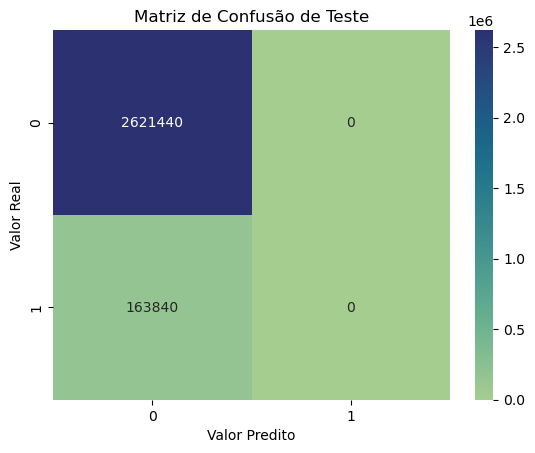

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_test, annot=True, fmt='d', cmap='crest')
plt.title('Matriz de Confusão de Teste')
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.savefig('mc_teste.png', format='png')
plt.show()


In [39]:
y_pred_argmax=np.argmax(y_pred, axis=3)
y_pred_argmax.shape

(10, 128, 128)

In [8]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 17
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(Y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.0057361485


In [ ]:
#Calculando o I0U para cada classe...
values = np.array(IOU_keras.get_weights()).reshape(NUM_CLASSES, NUM_CLASSES)
print(values)

In [ ]:
for i in range(NUM_CLASSES):
    class_iou = values[i,i]
    soma_iou = 0.0
    for j in range(NUM_CLASSES):
        if i==j:
            soma_iou += values[i,i]
        else:
            soma_iou += values[i,j]
            soma_iou += values[j,i]
            
    class_iou = class_iou/soma_iou       
    print(f"IoU for class {i+1} is: {class_iou}")

In [24]:
import random
num_imgs = 3556
test_img_number = random.randint(0, num_imgs-1)
X_test = test_data_generator(test_img_number, 'x')
Y_test = test_data_generator(test_img_number, 'y')


1/1 [==============================] - 0s 21ms/step


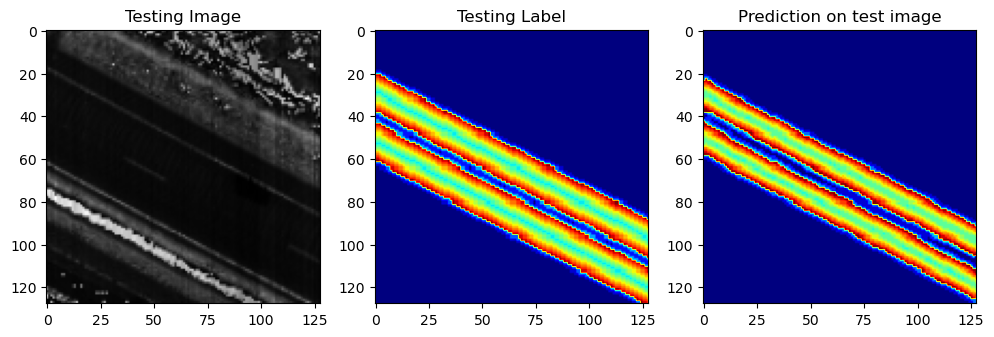

In [25]:
import random
import matplotlib.pyplot as plt
test_img = X_test[0]
ground_truth=Y_test[0]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.savefig('results_10k_32_10_0015_predict_custom1.png', format='png')
plt.show()


In [134]:
import json
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
test_df = "/kaggle/input/road-mapper-dataset-csv/predict_data50(1).csv"

df = pd.read_csv(
                  test_df, skiprows=0,
                  nrows=10)
n_classes = 17
x = []
y = []

for i in range(0, 10):
    x.append(json.loads(df.iloc[i,0]))
    y.append(json.loads(df.iloc[i,1]))

y = np.asarray(y)
# train_masks_cat = to_categorical(y, num_classes=n_classes)
# y_train_cat = train_masks_cat.reshape((y.shape[0], y.shape[1], y.shape[2], n_classes))

X_test = np.asarray(x)
Y_test = y

SyntaxError: invalid syntax (605350805.py, line 1)